In [1]:
# Libraries

import itertools
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt


In [9]:
# Helper Functions

def split_data_train_test(data, fraction_training):
    np.random.shuffle(data)
    limit = int(len(data) * fraction_training)
    training = data[0:limit]
    testing = data[limit:]
    return training, testing

def generate_features_targets(data):
    targets = data['class']
    features = np.empty(shape=(len(data), 13))
    #features[:, 0:4] = data['u-g', 'g-r', 'r-i', 'i-z']
    features[:, 0] = data['u-g']
    features[:, 1] = data['g-r']
    features[:, 2] = data['r-i']
    features[:, 3] = data['i-z']

    features[:, 4] = data['ecc']
    #features[:, 5:10] = data['m4_u', 'm4_g', 'm4_r', 'm4_i', 'm4_z']
    features[:, 5] = data['m4_u']
    features[:, 6] = data['m4_g']
    features[:, 7] = data['m4_r']
    features[:, 8] = data['m4_i']
    features[:, 9] = data['m4_z']

    #features[:, 10:13] = data['petroR50_u'] / data['petroR90_u'], data['petroR50_r'] / data['petroR90_r'], data['petroR50_z'] / data['petroR90_z']
    features[:, 10] = data['petroR50_u'] / data['petroR90_u']
    features[:, 11] = data['petroR50_r'] / data['petroR90_r']
    features[:, 12] = data['petroR50_z'] / data['petroR90_z']


    return features, targets

def train_and_evaluate(model, features, targets):
    predicted = cross_val_predict(model, features, targets, cv=10)
    accuracy = accuracy_score(targets, predicted)
    precision = precision_score(targets, predicted, average='macro')
    recall = recall_score(targets, predicted, average='macro')
    return accuracy, precision, recall, predicted

def plot_cm(cm, classes, model_name, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(f'{title} for {model_name}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')


Decision Tree Metrics:
Accuracy: 0.7564102564102564
Precision: 0.7518751090179662
Recall: 0.7573547346656803
Confusion matrix, without normalization
[[170  15   3]
 [ 23 116  52]
 [  3  37 127]]


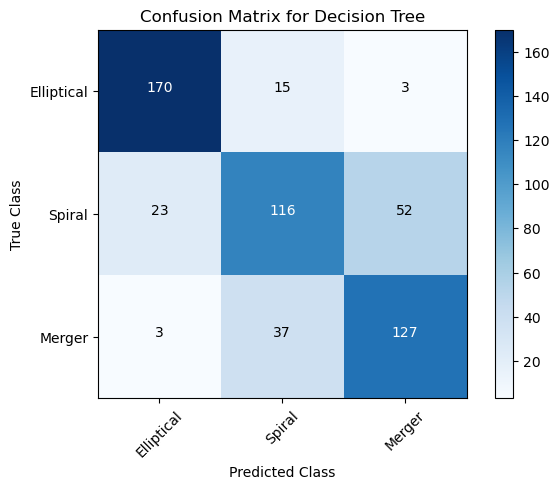

Testing Decision Tree Metrics:
Test Accuracy: 0.8076923076923077
Test Precision: 0.8021585187119992
Test Recall: 0.8048088410991637
Confusion matrix, without normalization
[[67  3  2]
 [ 8 46 15]
 [ 1 16 76]]


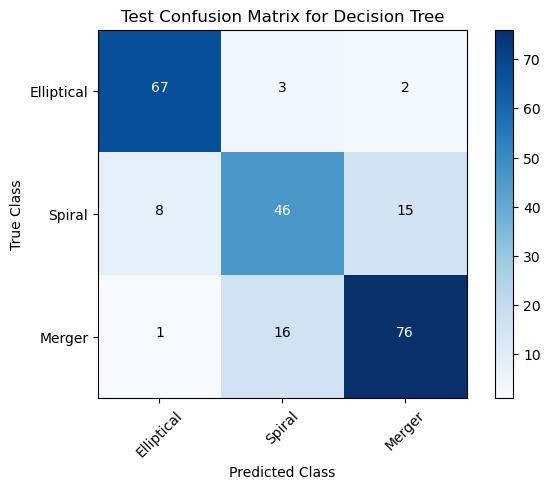

Random Forest Metrics:
Accuracy: 0.8461538461538461
Precision: 0.8470445906028728
Recall: 0.8449595740011567
Confusion matrix, without normalization
[[173  13   2]
 [ 11 154  26]
 [  1  31 135]]


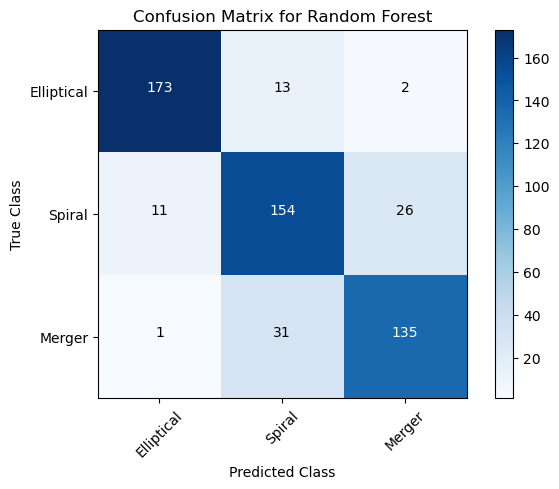

Testing Random Forest Metrics:
Test Accuracy: 0.8803418803418803
Test Precision: 0.8766389909713715
Test Recall: 0.877402472598826
Confusion matrix, without normalization
[[71  1  0]
 [ 7 52 10]
 [ 1  9 83]]


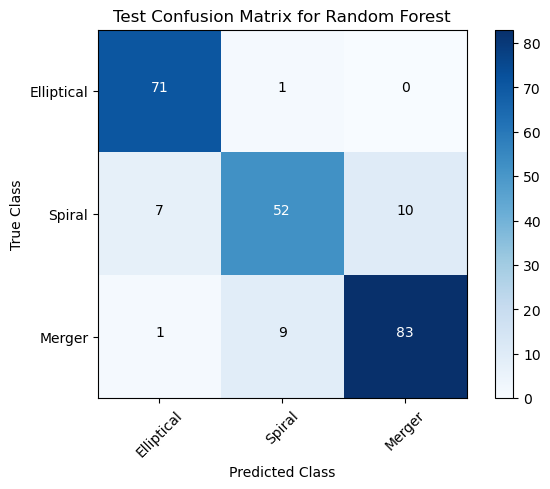

In [10]:
# Main Function

def main():
    data = np.load('data1/galaxy_catalogue.npy')
    training, testing = split_data_train_test(data, 0.7) # 70% training, 30% testing
    features, targets = generate_features_targets(training)
    test_features, test_targets = generate_features_targets(testing)

    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(n_estimators=50)
    }

    for model_name, model in models.items():
        accuracy, precision, recall, predicted = train_and_evaluate(model, features, targets)
        print(f'{model_name} Metrics:')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')

        cm = confusion_matrix(targets, predicted)
        plot_cm(cm, ['Elliptical', 'Spiral', 'Merger'], model_name)
        plt.show()

        test_accuracy, test_precision, test_recall, test_predicted = train_and_evaluate(model, test_features, test_targets)
        print(f'Testing {model_name} Metrics:')
        print(f'Test Accuracy: {test_accuracy}')
        print(f'Test Precision: {test_precision}')
        print(f'Test Recall: {test_recall}')

        test_cm = confusion_matrix(test_targets, test_predicted)
        plot_cm(test_cm, ['Elliptical', 'Spiral', 'Merger'], model_name, title='Test Confusion Matrix')
        plt.show()

if __name__ == '__main__':
    main()

